In [78]:
from keras.models import Model
from keras.layers import Dense #This is the layer which shows the layer is connected to all previous neuron
from keras.layers import Input
#from sklearn.datasets import make_circles
#from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [79]:
data=pd.read_csv("mnist_train_small.csv").values

In [80]:
X=data[:,2:]

In [81]:
y=data[:,1]

In [82]:
ohe=OneHotEncoder(categories="auto")

In [100]:
y_hot=ohe.fit_transform(y.reshape(-1,1))

In [101]:
y[:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=int64)

In [102]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)]

In [103]:
y_hot.todense()[:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

In [47]:
model=Model()

In [48]:
X.shape

(8000, 784)

In [69]:
in_layer=Input(shape=[784])# This is showing inputs of first layer
layer_1=Dense(200,activation="relu")(in_layer)
layer_2=Dense(50,activation="relu")(layer_1)  #This shows it is connected to layer 1 and this is called functinal api that means layer 1 is function of layer 1 in this
layer_3=Dense(10,activation="softmax")(layer_2)

In [70]:
model=Model(inputs=[in_layer],outputs=[layer_3])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_22 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [73]:
hist=model.fit(X_train,y_train,epochs=10,batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 1s 154us/step - loss: 10.3037 - acc: 0.3466
Epoch 2/10
5360/5360 [==============================] - 0s 64us/step - loss: 7.2568 - acc: 0.5397
Epoch 3/10
5360/5360 [==============================] - 0s 63us/step - loss: 6.3000 - acc: 0.6021
Epoch 4/10
5360/5360 [==============================] - 0s 59us/step - loss: 5.9674 - acc: 0.6256
Epoch 5/10
5360/5360 [==============================] - 0s 65us/step - loss: 5.7823 - acc: 0.6354
Epoch 6/10
5360/5360 [==============================] - 0s 62us/step - loss: 5.7525 - acc: 0.6394
Epoch 7/10
5360/5360 [==============================] - 0s 62us/step - loss: 5.6715 - acc: 0.6446
Epoch 8/10
5360/5360 [==============================] - 0s 66us/step - loss: 5.5877 - acc: 0.6494
Epoch 9/10
5360/5360 [==============================] - 0s 76us/step - loss: 5.4930 - acc: 0.6563
Epoch 10/10
5360/5360 [==============================] - 0s 80us/step - loss: 5.4832 - acc: 0.6558


In [74]:
hist_accu=hist.history["acc"]

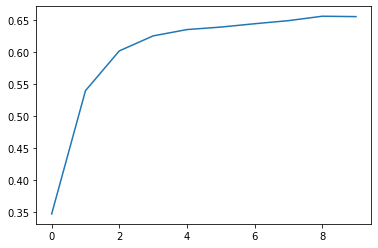

In [75]:
plt.plot(hist_accu)

In [76]:
hist_loss=hist.history["loss"]

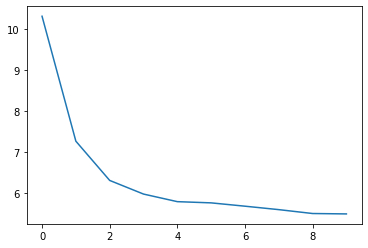

In [77]:
plt.plot(hist_loss)